In [ ]:
from jax import numpy as jnp
from jax import random, jit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
train = pd.read_csv('../datasets/bank-note/train.csv', header=None).to_numpy()
test = pd.read_csv('../datasets/bank-note/test.csv', header=None).to_numpy()
### last column is label (-1,1)

x_train = train[:,:-1]
y_train = train[:,-1:]
y_train = np.where(y_train == 0, -1,1)

x_test = test[:,:-1]
y_test = test[:,-1:]
y_test= np.where(y_test == 0, -1,1)

# add column of ones to wrap in b
x_train = np.concatenate((x_train, np.ones((x_train.shape[0],1))), axis=1)
x_test = np.concatenate((x_test, np.ones((x_test.shape[0],1))), axis=1)

shuffle = np.random.choice(len(x_train), len(x_train), replace=False)
x_train = x_train[shuffle]
y_train = y_train[shuffle]

In [ ]:
from log_reg import (init_params,
                     model_backprop,
                     model_forward,
                     update_params)

In [ ]:
key = random.PRNGKey(seed=42)
n_h = 2
lr = 0.0001
num_epochs = 100000
print_at = 100
 
X = x_train
y = y_train
872 x 1 @ 
mse = lambda preds,y: 0.5*((y-preds)**2).sum()
bce_loss = lambda preds, y: ((np.log(preds).T @ y) + \
                             (np.log(1-preds).T @ (1-y))) * \
                                (-1/m)

params = init_params(key, X.shape[1], n_h, n_y=1)
losses = np.zeros((num_epochs,))

@jit
def update(params):
    preds, caches = model_forward(X, params)
    grads = model_backprop(preds, y, caches)
    params = update_params(params, grads, lr)
    return params, preds
### update sgd? just call updatr w/ subset of X/y 

# Loop (gradient descent)
for i in range(num_epochs):
    ### should be able to jit update
    params, preds = update(params)
    loss = bce_loss(preds, y)
    if i % print_at == 0:
        print(loss)
    losses[i] = loss



685.56775
528.28723
480.43185
463.65656
455.6983
451.14575
448.2182
446.18246
444.6859
443.53955
442.63315
441.8981
441.28986
440.77795
440.34106
439.96365
439.63422
439.34406
439.08655
438.85632
438.64932
438.4621
438.292
438.13672
437.99445
437.86365
437.74295
437.63126
437.5277
437.4314
437.34164
437.25787
437.17947
437.10608
437.03717
436.9724
436.91144
436.854
436.7998
436.7486
436.70013
436.65424
436.61066
436.5693
436.52997
436.4925
436.4568
436.42273
436.39014
436.35895
436.32904
436.30038
436.27283
436.24628
436.22076
436.19617
436.17236
436.14935
436.12708
436.10553
436.0846
436.06427
436.0445
436.0252
436.0065
435.98816
435.97025
435.95276
435.9356
435.91882
435.90234
435.88617
435.87027
435.8546
435.8392
435.82404
435.80902
435.79425
435.7796
435.76514
435.75082
435.73663
435.72256
435.70862
435.6947
435.68094
435.6672
435.65356
435.63995
435.6264
435.61288
435.59937
435.58594
435.57245
435.55896
435.54547
435.53198
435.51846
435.5049
435.4913
435.47763
435.46393
435.4502
4

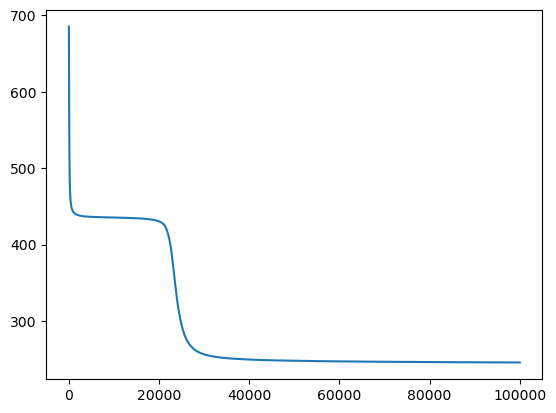

In [ ]:
plt.plot(losses)